<a href="https://colab.research.google.com/github/ThiagoKoscak/PUCRJ-M3/blob/main/Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Olimpíadas**

## Descrição
Este trabalho visa construir um pipeline que irá envolver a busca, coleta e análise de dados com foco em visualização dos dados.

## Objetivo
Analisar os dados coletados a fim de conseguir insights.
Não há um objetivo inicial de criação de um modelo de Machine Learning.

## Plataforma
Irei utilizar o google colab para apresentar as etapas de coleta e análise de dados.



#  1 - Busca pelos dados / Coleta

Optei por coletar dados do Kaggle, plataforma que já utilizei como base para coleta dos dados do módulo anterior.
Estou usando como base os dados fornecidos por este dataset:
https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data

Segundo a descrição desse dataset, os dados foram coletados do site www.sports-reference.com em Maio de 2018 e apresentam os dados históricos das olimpíadas de Atenas em 1896 até Rio de Janeiro em 2016.

## Dados

Os dados foram coletados do Kaggle e disponibilizados no GitHub para facilitar a interação com os dados. Os dados possuem licença CC0: Public Domain, podendo assim ser disponibilizados dessa forma.



*   **athlete_events.csv**


1. ID - Número identificador unico de cada atleta
2. Name - Nome do Atleta
3. Sex - Masculino ou Feminino (M ou F)
4. Age - Idade do atleta
5. Height - Altura do atleta em centimetros
6. Weight - Peso do atleta em quilos
7. Team - Nome do Time, sendo na grande maioria o nome do país
8. NOC - "National Olympic Committee" Código de 3 letras referente ao país
9. Games - Ano dos jogos seguido de verão ou inverno (Summer/Winter)
10. Year - Ano dos jogos
11. Season - Verão ou inverno (Summer/Winter)
12. City - Cidade que foi sede dos jogos
13. Sport - Esporte
14. Event - Descrição com mais detalhes do esporte
15. Medal - Descreve qual medalha foi ganha (Gold/Silver/Bronze), sendo NA em caso de nenhuma

*   **noc_regions.csv**

1. NOC - "National Olympic Committee" Código de 3 letras referente ao país
2. Region - Possui o nome do país, com algumas exceções
3. Notes - Alguns detalhes para os casos atípicos

In [79]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sqlalchemy -q
from sqlalchemy import create_engine, text
import warnings
from matplotlib.cbook import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

In [80]:
# Coleta dos dados
df = pd.read_csv('https://raw.githubusercontent.com/ThiagoKoscak/PUCRJ-M2/main/athlete_events.csv')
df_noc = pd.read_csv('https://raw.githubusercontent.com/ThiagoKoscak/PUCRJ-M2/main/noc_regions.csv')

# Convertendo o csv para Parquet a fim de melhorar a leitura
df.to_parquet('athlete_events.parquet')
df = pd.read_parquet('athlete_events.parquet')

df_noc = df_noc.to_parquet('noc_regions.parquet')
df_noc = pd.read_parquet('noc_regions.parquet')

In [81]:
display(df)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


# 2 - Análise de Dados





### 2.1 - Validação de colunas numéricas

Aparentemente não há nenhuma coluna numérica com uma String, porém iremos ter um controle sobre isso ainda assim.

In [82]:
#Detalhes sobre os dados
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [83]:
# Define a função que verifica se cada valor é do tipo numérico
def is_numeric(x):
    return isinstance(x, (int, float))

# Aplica a função a cada valor nas colunas "ID", "Age", "Height", "Weight" e "Year"
numeric_cols = ['ID', 'Age', 'Height', 'Weight', 'Year']
numeric_mask = df[numeric_cols].map(is_numeric)

# Remove os registros com valores de string nas colunas numéricas
df = df[numeric_mask.all(axis=1)]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### 2.2 - Análise de nulos
No código abaixo, podemos notar que existem muitos valores nulos em Idade, Peso e Tamanho, porém como não iremos utilizar esses dados para nenhuma análise, irei mantê-los dessa maneira.
Quanto aos nulos nas medalhas, representam os atletas que não ganharam medalhas e será tratado em outra momento.

In [85]:
# Contagem de valores nulos
null_counts = df.isnull().sum()
print(null_counts)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


<ipython-input-86-b71ca987cea8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


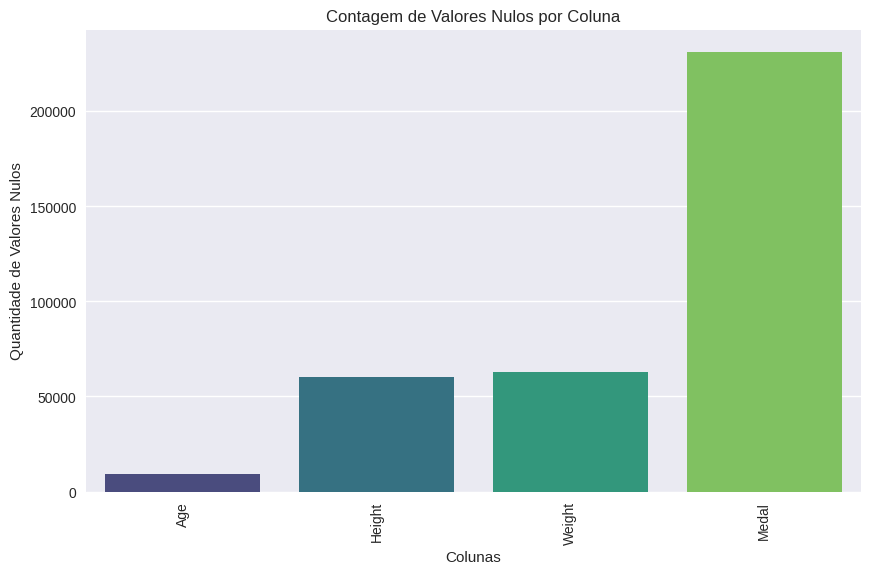

In [86]:
# Contagem de valores nulos por coluna
null_counts = df.isnull().sum()

# Filtra apenas colunas com valores nulos
null_counts = null_counts[null_counts > 0]

# Configura o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")

# Personaliza o gráfico
plt.xticks(rotation=90)  # Rotaciona os nomes das colunas para facilitar a leitura
plt.title('Contagem de Valores Nulos por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Valores Nulos')

# Exibe o gráfico
plt.show()


### 2.3 - Histogramas

Aqui podemos notar alguns pontos interessantes:

*   Os atletas costumam ser novos, tendo na sua maioria menos que 30 anos;
*   Os atletas costumam ser mais magros, podemos observar que a média de peso está por volta dos 75 Kg (não estamos fazendo distinção de homens e mulheres);
*   A quantidade de atletas aumentou muito no decorrer dos anos.



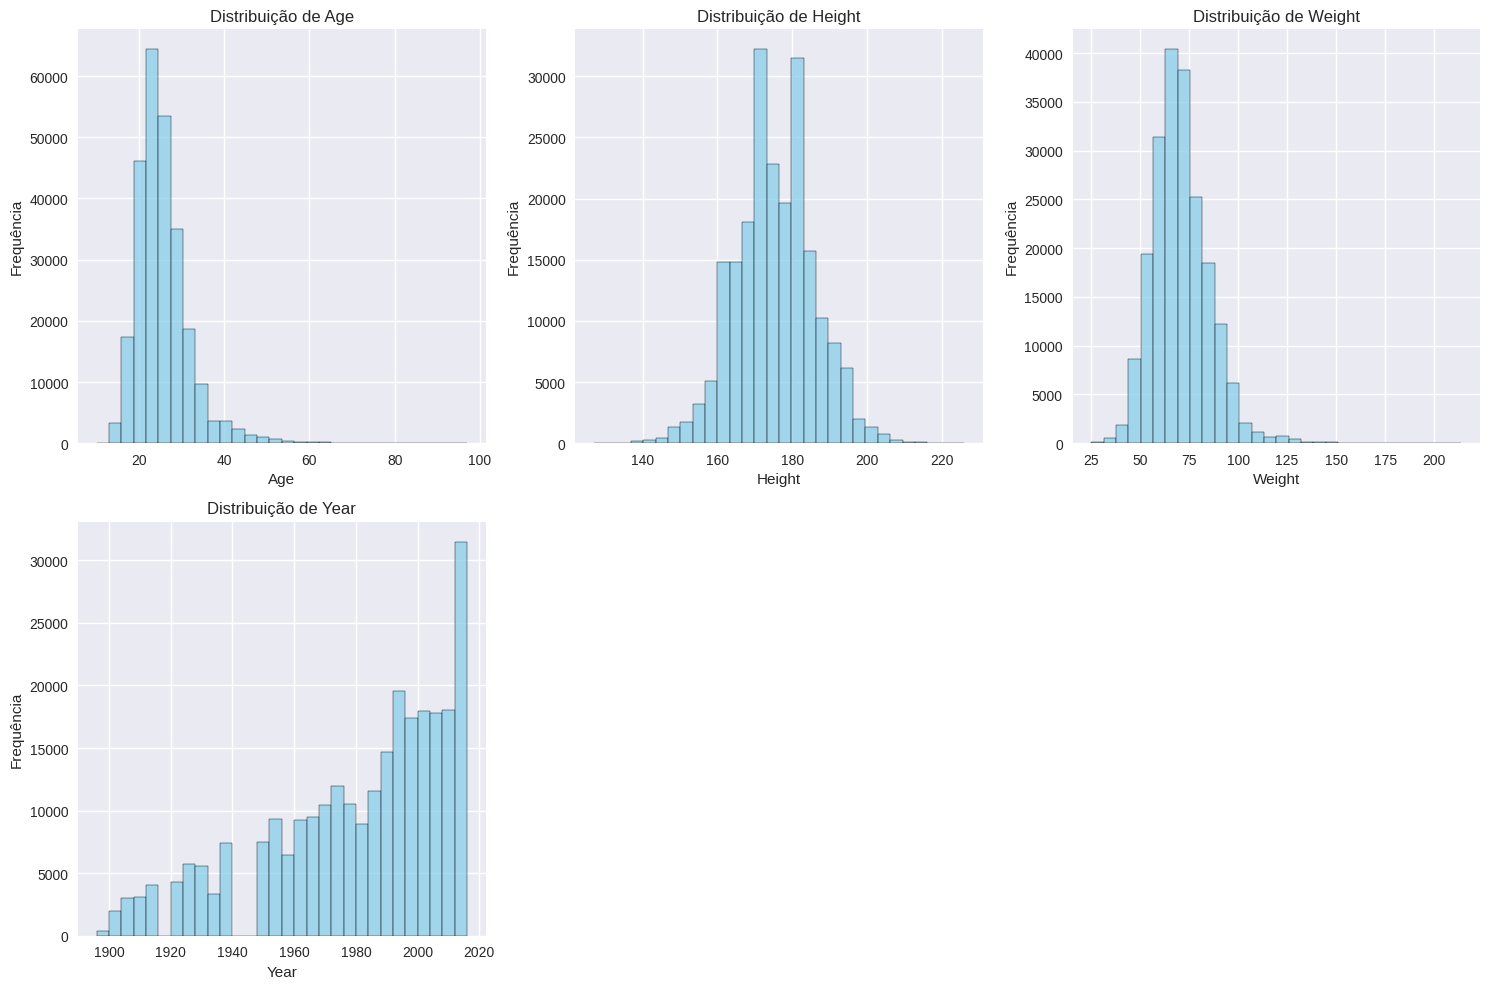

In [87]:
# Filtra apenas colunas numéricas
numerical_columns = ['Age', 'Height', 'Weight', 'Year']

# Configura o tamanho geral da figura para acomodar todos os gráficos
plt.figure(figsize=(15, 10))

# Gera histogramas para cada coluna numérica
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)  # Organiza os subplots
    sns.histplot(df[column], bins=30, color='skyblue')  # Histograma com linha de densidade
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

plt.tight_layout()  # Ajusta o layout
plt.show()


### 2.4 - Peso x Altura

Podemos notar uma grande correlação entre peso e altura, reforçando que os atletas normalmente costumam ser magros e estar dentro do peso (variando de acordo com o esporte).
<br>O heatmap ressalta mais essa característica dos dados.

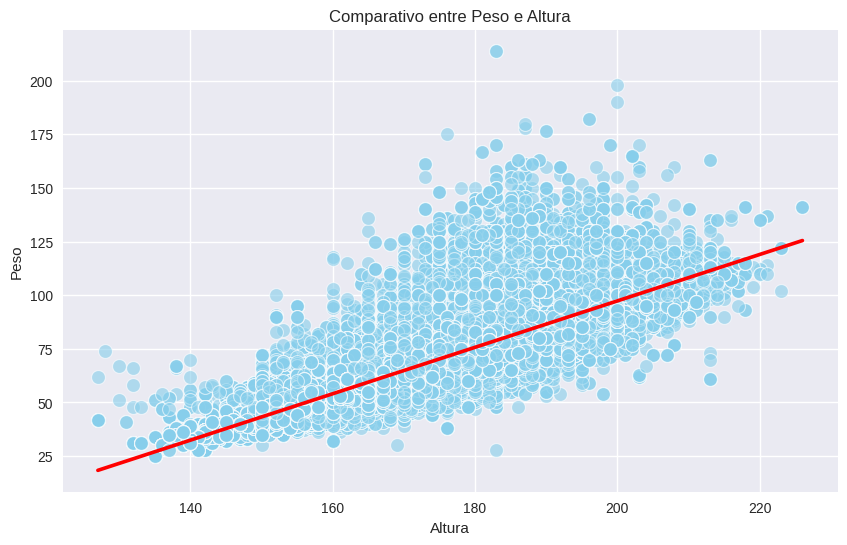

In [88]:
# Configura o tamanho da figura
plt.figure(figsize=(10, 6))

# Cria o gráfico de dispersão com linha de regressão
sns.scatterplot(data=df, x='Height', y='Weight', color='skyblue', s=100, alpha=0.6)

# Adiciona uma linha de regressão
sns.regplot(data=df, x='Height', y='Weight', scatter=False, color='red')

# Personaliza o gráfico
plt.title('Comparativo entre Peso e Altura')
plt.xlabel('Altura')
plt.ylabel('Peso')

# Exibe o gráfico
plt.show()


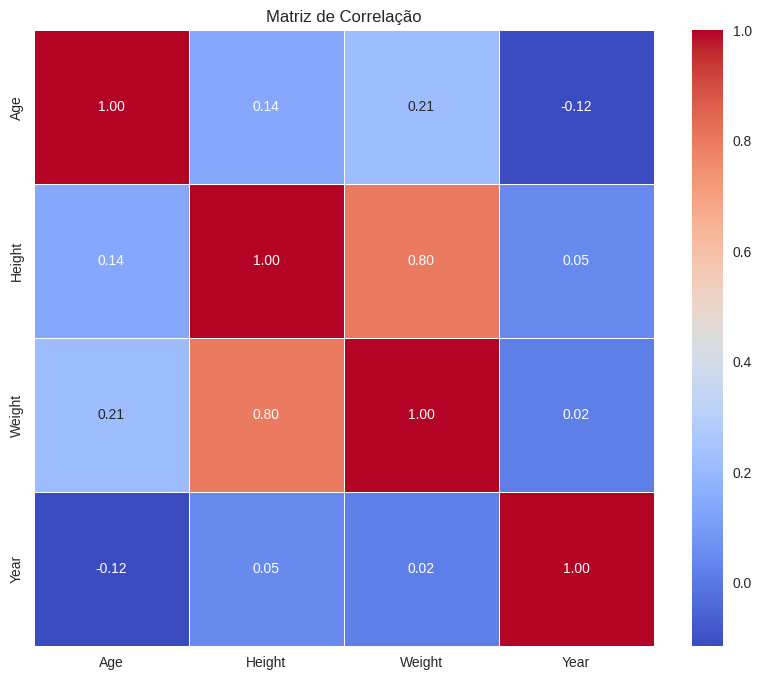

In [89]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

### 2.5 - Remoção de duplicatas

No código abaixo, estamos encontrando dados duplicados, então estou fazendo uma rotina para remoção.

In [90]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",None
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",None
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",None
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",None
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",None


In [91]:
# Obtém os índices das linhas duplicadas
duplicate_indices = duplicate_rows.index

# Remove as linhas duplicadas do dataframe original
df = df.drop(duplicate_indices)

### 2.6 - Verificação de Season

Não foi encontrado nenhum caso, mas ainda assim iremos utilizar essa regra.
Hoje em dia existe uma diferença de dois anos entre os jogos de verão e inverno, porém antigamente os jogos aconteciam no mesmo ano, então essa separação é importante.



In [92]:
df['Season'].value_counts()

,count
Season,
Summer,221167
Winter,48564


In [93]:
# Remove qualquer linha que não tenha "Summer" ou "Winter" na coluna "Season"
df = df.query('Season == "Summer" or Season == "Winter"')

### 2.7 - Verificação de Sports

Não foi encontrado nenhum caso de Sport que pareça ter seu nome errado, então não foi criado nenhum tipo de ajuste.

In [94]:
sport_count= df['Sport'].value_counts()
# Convertendo para string para poder ver todas as linhas no notebook
sport_count = sport_count.to_string()
print(sport_count)

Sport
Athletics                    38624
Gymnastics                   26707
Swimming                     23195
Shooting                     11448
Cycling                      10827
Fencing                      10735
Rowing                       10595
Cross Country Skiing          9133
Alpine Skiing                 8829
Wrestling                     7154
Football                      6745
Sailing                       6549
Equestrianism                 6343
Canoeing                      6171
Boxing                        6047
Speed Skating                 5613
Ice Hockey                    5516
Hockey                        5417
Biathlon                      4893
Basketball                    4536
Weightlifting                 3937
Water Polo                    3846
Judo                          3801
Handball                      3665
Volleyball                    3404
Bobsleigh                     3058
Tennis                        2862
Diving                        2842
Ski Jumping   

### 2.8 - Verificação de Ano

Não foi encontrado nenhum caso onde a data não seja entre as primeiras olimpíadas (1896) e a data atual, ainda assim criei um controle para evitar esse tipo de dado.

In [95]:
import datetime

# Obtém o ano atual
current_year = datetime.datetime.now().year

# Verifica se há algum ano inválido na coluna "Year"
any_invalid_year = ((df['Year'] < 1896) | (df['Year'] > current_year)).any()

# Imprime o resultado da verificação
print(any_invalid_year)


False


In [96]:
# Remove qualquer registro com um ano fora do intervalo entre 1896 e o ano atual
df = df.query('1896 <= Year <= @current_year')

### 2.9 - Verificação de NOC duplicados

Não foram encontrados, porém não criarei nenhuma regra, uma vez que caso isso ocorra, o caso deverá ser analisado a parte.


In [97]:
duplicates = df_noc.duplicated(subset=["NOC"])
duplicate_rows = df_noc[duplicates]
duplicate_rows.head()

,NOC,region,notes


### 2.10 - Limpeza de espaços em branco das strings

In [98]:
# Remove todos os caracteres invisíveis e espaços em branco no início e no final do nome
df['Name'] = df['Name'].str.strip()
df['Sport'] = df['Sport'].str.strip()
df['Event'] = df['Event'].str.strip()

# 3 - Pré-processamento

### 3.1 - Criação de uma coluna de cidade no arquivo de NOC

Nesse ponto iremos criar um mapeamento manual entre cidades sede e NOCs, para poder chegar na informação de país sede.




In [99]:
cities = df['City'].unique().tolist()
cities

['Barcelona',
 'London',
 'Antwerpen',
 'Paris',
 'Calgary',
 'Albertville',
 'Lillehammer',
 'Los Angeles',
 'Salt Lake City',
 'Helsinki',
 'Lake Placid',
 'Sydney',
 'Atlanta',
 'Stockholm',
 'Sochi',
 'Nagano',
 'Torino',
 'Beijing',
 'Rio de Janeiro',
 'Athina',
 'Squaw Valley',
 'Innsbruck',
 'Sarajevo',
 'Mexico City',
 'Munich',
 'Seoul',
 'Berlin',
 'Oslo',
 "Cortina d'Ampezzo",
 'Melbourne',
 'Roma',
 'Amsterdam',
 'Montreal',
 'Moskva',
 'Tokyo',
 'Vancouver',
 'Grenoble',
 'Sapporo',
 'Chamonix',
 'St. Louis',
 'Sankt Moritz',
 'Garmisch-Partenkirchen']

In [100]:
# Criação de um dicionário com a relação entre cidade e NOC, assim posso saber qual foi o país sede.
city_to_noc = {
    'Barcelona': 'ESP',
    'London': 'GBR',
    'Antwerpen': 'BEL',
    'Paris': 'FRA',
    'Calgary': 'CAN',
    'Albertville': 'FRA',
    'Lillehammer': 'NOR',
    'Los Angeles': 'USA',
    'Salt Lake City': 'USA',
    'Helsinki': 'FIN',
    'Lake Placid': 'USA',
    'Sydney': 'AUS',
    'Atlanta': 'USA',
    'Stockholm': 'SWE',
    'Sochi': 'RUS',
    'Nagano': 'JPN',
    'Torino': 'ITA',
    'Beijing': 'CHN',
    'Rio de Janeiro': 'BRA',
    'Athina': 'GRE',
    'Squaw Valley': 'USA',
    'Innsbruck': 'AUT',
    'Sarajevo': 'YUG',
    'Mexico City': 'MEX',
    'Munich': 'FRG',
    'Seoul': 'KOR',
    'Berlin': 'GER',
    'Oslo': 'NOR',
    'Cortina d\'Ampezzo': 'ITA',
    'Melbourne': 'AUS',
    'Roma': 'ITA',
    'Amsterdam': 'NED',
    'Montreal': 'CAN',
    'Moskva': 'RUS',
    'Tokyo': 'JPN',
    'Vancouver': 'CAN',
    'Grenoble': 'FRA',
    'Sapporo': 'JPN',
    'Chamonix': 'FRA',
    'St. Louis': 'USA',
    'Sankt Moritz': 'SUI',
    'Garmisch-Partenkirchen': 'GER'
}

# Adiciona a nova coluna 'City' ao dataframe df_noc_silver usando o dicionário
df['NOC_Sede'] = df['City'].map(city_to_noc.get)

### 3.2 - Verificação de regiões sem valor ou ausentes

A coluna notes num geral traz informações como nomes antigos ou nomes alternativos daquela região.
Porém nesses poucos casos em que a coluna region está com valor nulo, essa coluna notes traz uma informação melhor, então iremos utilizar ela no lugar de region nesses casos.

In [101]:
# Contagem de valores nulos
null_counts = df_noc.isnull().sum()
null_counts

,0
NOC,0
region,3
notes,209


In [102]:
null_region_df = df_noc[df_noc['region'].isnull()]
null_region_df

,NOC,region,notes
168,ROT,None,Refugee Olympic Team
208,TUV,None,Tuvalu
213,UNK,None,Unknown


In [103]:
df_noc.loc[df_noc['region'].isnull(), 'region'] = df_noc['notes']

In [104]:
# Adicionar os NOCs ausentes
novos_dados = pd.DataFrame({'NOC': ['SGP'], 'region': ['Singapore']})

# Concatena o novo dataframe ao dataframe original df_noc
df_noc = pd.concat([df_noc, novos_dados], ignore_index=True)

### 3.3 - Divisão de medalhas

Separação da coluna Medal, em três colunas representando a contagem de medalhas de Ouro, Prata e Bronze.

In [105]:
df = pd.get_dummies(df, columns=['Medal'], prefix='Medal', dtype=int)

### 3.4 - Verificação de Time / Solo

Como essa análise é por atleta, eu tenho que levar em consideração quais esportes são individuais e quais são em time, já que por exemplo, em um time de futebol eu teria 22 medalhas.

Primeiramente cogitei fazer uma agregação por 'Team', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event','Medal_Bronze','Medal_Silver','Medal_Gold', porém há esportes que são individuais e possui diversos atletas do mesmo país.

Com isso foi criado um banco de palavras chaves que definem se o esporte é em grupo (Team), e os que não se encaixam serão do tipo individual(Solo).

Com as verificações que fiz com os dados oficiais das olimpíadas, fui capaz de gerar dados muito próximos dos reais, com algumas diferenças devido a medalhas que foram removidas posteriormente (como em casos de doping) e que esses dados não contemplam.


In [106]:
# Gera a lista de eventos únicos
events = df['Event'].unique().tolist()
events

["Basketball Men's Basketball",
 "Judo Men's Extra-Lightweight",
 "Football Men's Football",
 "Tug-Of-War Men's Tug-Of-War",
 "Speed Skating Women's 500 metres",
 "Speed Skating Women's 1,000 metres",
 "Cross Country Skiing Men's 10 kilometres",
 "Cross Country Skiing Men's 50 kilometres",
 "Cross Country Skiing Men's 10/15 kilometres Pursuit",
 "Cross Country Skiing Men's 4 x 10 kilometres Relay",
 "Cross Country Skiing Men's 30 kilometres",
 "Athletics Women's 100 metres",
 "Athletics Women's 4 x 100 metres Relay",
 "Ice Hockey Men's Ice Hockey",
 "Swimming Men's 400 metres Freestyle",
 "Badminton Men's Singles",
 "Sailing Women's Windsurfer",
 "Biathlon Women's 7.5 kilometres Sprint",
 "Swimming Men's 200 metres Breaststroke",
 "Swimming Men's 400 metres Breaststroke",
 "Gymnastics Men's Individual All-Around",
 "Gymnastics Men's Team All-Around",
 "Gymnastics Men's Floor Exercise",
 "Gymnastics Men's Horse Vault",
 "Gymnastics Men's Parallel Bars",
 "Gymnastics Men's Horizontal Bar

In [107]:
# criar expressão regular para identificar eventos em time
palavras_chaves = r'\b(Relay|Team|Double|Pair|Mixed|Four|Eight|Coxed|Coxless|Synchronized|Doubles|Fours|Eights|Quadruple|Quad|Sculls|Pursuit|Keirin|Madison|Sprint|Omnium|Time Trial|Road Race|Criterium|Points Race|Elimination Race|Scratch Race|Handball|Volleyball|Basketball|Football|Hockey|Rugby|Water Polo|Ice Hockey|Beach Volleyball|Handball|Two|Group|Skiff|Curling)\b'

# adicionar coluna Event_Type ao dataframe
df['Event_Type'] = 'Solo'

# preencher coluna Event_Type com "Team" para eventos em time
df.loc[df['Event'].str.contains(palavras_chaves, na=False), 'Event_Type'] = 'Team'


<ipython-input-107-5deb11ab4987>:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['Event'].str.contains(palavras_chaves, na=False), 'Event_Type'] = 'Team'


### 3.5 - Verificação de quadro de medalhas

Agora que somos capazes de tratar a informações de Time / Solo, somos capazes de gerar um quadro de medalhas.
<br>Gerei o de 2016 apenas para conferência com os dados oficiais.
<br>Podemos verificar que está bem próximo dos dados oficiais, tendo pequenas variações, muitas delas causadas por dopping.

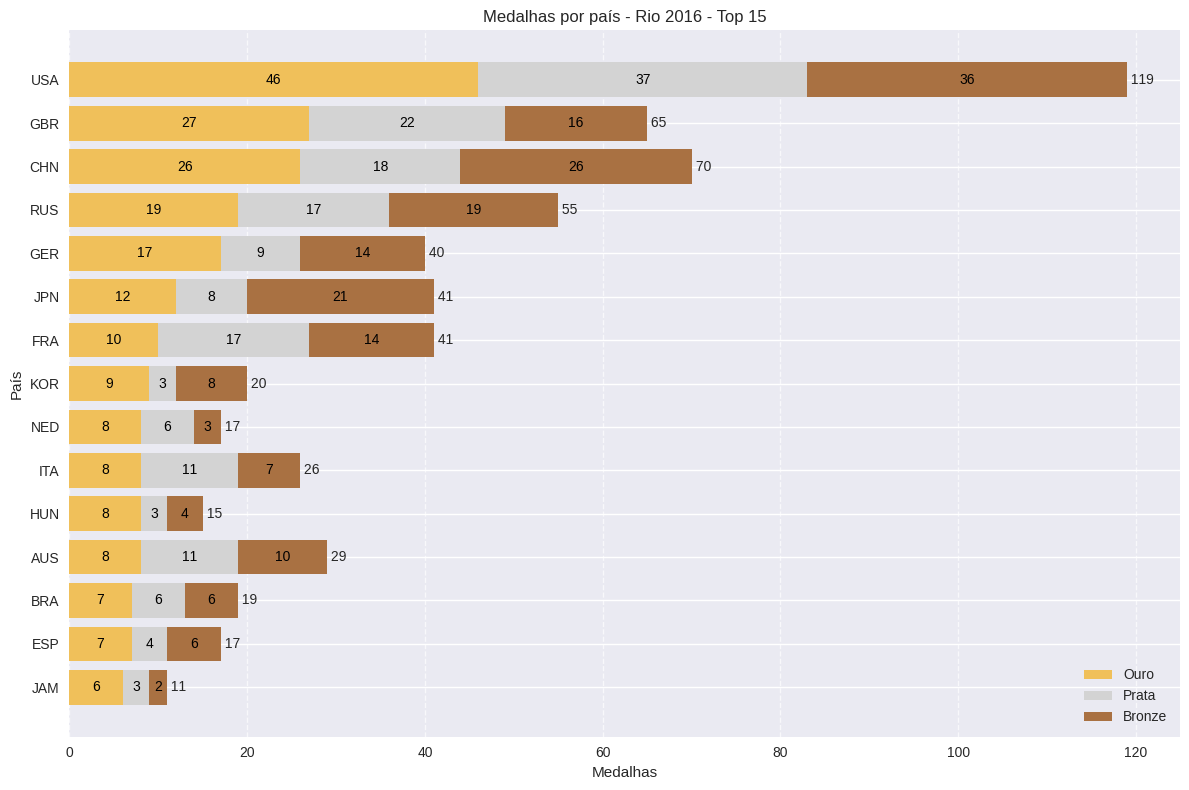

In [108]:
df_2016 = df[df['Year'] == 2016].copy()

# Tratamento para eventos individuais e em equipe
df_2016['Medal_Count'] = np.where(df_2016['Event_Type'] == 'Solo', 1,
                                       1 / df_2016.groupby(['NOC', 'Year', 'Sport', 'Event', 'Medal_Gold'])['ID'].transform('count'))

# Agrupando por NOC e somando as medalhas
medal_counts = df_2016.groupby('NOC').agg({
    'Medal_Count': 'sum',
    'Medal_Gold': lambda x: (x * df_2016.loc[x.index, 'Medal_Count']).sum(),
    'Medal_Silver': lambda x: (x * df_2016.loc[x.index, 'Medal_Count']).sum(),
    'Medal_Bronze': lambda x: (x * df_2016.loc[x.index, 'Medal_Count']).sum()
}).reset_index()

# Arredondando os valores para inteiros
for col in ['Medal_Gold', 'Medal_Silver', 'Medal_Bronze']:
    medal_counts[col] = medal_counts[col].round(0).astype(int)

# Calculando o total de medalhas
medal_counts['Total'] = medal_counts['Medal_Gold'] + medal_counts['Medal_Silver'] + medal_counts['Medal_Bronze']

# Ordenando por medalhas de ouro e pegando os top 15
medal_counts = medal_counts.sort_values('Medal_Gold', ascending=False).head(15)

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Plotando as barras na nova ordem: ouro > prata > bronze
ax.barh(medal_counts['NOC'], medal_counts['Medal_Gold'], label='Ouro', color='#f0c05a')
ax.barh(medal_counts['NOC'], medal_counts['Medal_Silver'], left=medal_counts['Medal_Gold'], label='Prata', color='Lightgray')
ax.barh(medal_counts['NOC'], medal_counts['Medal_Bronze'],
        left=medal_counts['Medal_Gold'] + medal_counts['Medal_Silver'], label='Bronze', color='#a97142')

# Adicionando os números dentro das barras
for i, country in enumerate(medal_counts['NOC']):
    gold = medal_counts.loc[medal_counts['NOC'] == country, 'Medal_Gold'].values[0]
    silver = medal_counts.loc[medal_counts['NOC'] == country, 'Medal_Silver'].values[0]
    bronze = medal_counts.loc[medal_counts['NOC'] == country, 'Medal_Bronze'].values[0]
    total = medal_counts.loc[medal_counts['NOC'] == country, 'Total'].values[0]

    # Ouro
    ax.text(gold/2, i, str(gold), va='center', ha='center', color='black')
    # Prata
    ax.text(gold + silver/2, i, str(silver), va='center', ha='center', color='black')
    # Bronze
    ax.text(gold + silver + bronze/2, i, str(bronze), va='center', ha='center', color='black')
    # Total
    ax.text(total, i, f' {total}', va='center', ha='left')

# Customizando o gráfico
ax.set_title('Medalhas por país - Rio 2016 - Top 15')
ax.set_xlabel('Medalhas')
ax.set_ylabel('País')
ax.legend(loc='lower right')

# Invertendo o eixo y para que o país com mais medalhas fique no topo
ax.invert_yaxis()

# Adicionando uma grade
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Removendo as bordas do topo e da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### 3.6 - Join dos dois arquivos

Como o arquivo df_noc ficou com pouco conteúdo, resolvi fazer o join dois dois para facilitar o entendimento.

In [109]:
df = df.merge(df_noc, left_on='NOC', right_on='NOC', how='inner')
df = df.merge(df_noc, left_on='NOC_Sede', right_on='NOC', how='inner')

### 3.7 - Seleção das colunas que serão utilizadas

Passar a lista de colunas que queremos utilizar para análise.

In [110]:
df_list = ['ID', 'Name', 'Sex', 'Age','Height','Weight','NOC_x','region_x','Year','Season','City','NOC_y','region_y','Sport','Event','Event_Type','Medal_Bronze','Medal_Silver','Medal_Gold']
df = df[df_list]

### 3.8 - Renomear colunas

Trazer os nomes para portugues

In [111]:
df_map = {'ID': 'id',
                  'Name': 'nome',
                  'Sex': 'sexo',
                  'Age': 'idade',
                  'Height': 'altura',
                  'Weight': 'peso',
                  'NOC_x': 'con',
                  'region_x': 'pais',
                  'Year': 'ano',
                  'Season': 'temporada',
                  'City': 'cidade_sede',
                  'NOC_y': 'con_sede',
                  'region_y': 'pais_sede',
                  'Sport': 'esporte',
                  'Event': 'esporte_detalhe',
                  'Event_Type': 'esporte_tipo',
                  'Medal_Bronze': 'bronze',
                  'Medal_Silver': 'prata',
                  'Medal_Gold': 'ouro'}

df= df.rename(columns=df_map)
df

,id,nome,sexo,idade,altura,peso,con,pais,ano,temporada,cidade_sede,con_sede,pais_sede,esporte,esporte_detalhe,esporte_tipo,bronze,prata,ouro
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,China,1992,Summer,Barcelona,ESP,Spain,Basketball,Basketball Men's Basketball,Team,0,0,0
1,6848,Bai Chongguang,M,21.0,184.0,83.0,CHN,China,1992,Summer,Barcelona,ESP,Spain,Boxing,Boxing Men's Light-Heavyweight,Solo,0,0,0
2,6854,Bai Mei,F,17.0,166.0,46.0,CHN,China,1992,Summer,Barcelona,ESP,Spain,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,Solo,0,0,0
3,11225,Bi Zhong,M,23.0,188.0,110.0,CHN,China,1992,Summer,Barcelona,ESP,Spain,Athletics,Athletics Men's Hammer Throw,Solo,0,0,0
4,17295,Cai Yanshu,M,28.0,169.0,79.0,CHN,China,1992,Summer,Barcelona,ESP,Spain,Weightlifting,Weightlifting Men's Light-Heavyweight,Solo,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269726,106528,Leopold Schdler,M,21.0,NaN,NaN,LIE,Liechtenstein,1948,Winter,Sankt Moritz,SUI,Switzerland,Alpine Skiing,Alpine Skiing Men's Downhill,Solo,0,0,0
269727,106528,Leopold Schdler,M,21.0,NaN,NaN,LIE,Liechtenstein,1948,Winter,Sankt Moritz,SUI,Switzerland,Alpine Skiing,Alpine Skiing Men's Combined,Solo,0,0,0
269728,108435,Theodor Sele,M,16.0,NaN,NaN,LIE,Liechtenstein,1948,Winter,Sankt Moritz,SUI,Switzerland,Alpine Skiing,Alpine Skiing Men's Downhill,Solo,0,0,0
269729,108435,Theodor Sele,M,16.0,NaN,NaN,LIE,Liechtenstein,1948,Winter,Sankt Moritz,SUI,Switzerland,Alpine Skiing,Alpine Skiing Men's Combined,Solo,0,0,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               269731 non-null  int64  
 1   nome             269731 non-null  object 
 2   sexo             269731 non-null  object 
 3   idade            260416 non-null  float64
 4   altura           210917 non-null  float64
 5   peso             208204 non-null  float64
 6   con              269731 non-null  object 
 7   pais             269731 non-null  object 
 8   ano              269731 non-null  int64  
 9   temporada        269731 non-null  object 
 10  cidade_sede      269731 non-null  object 
 11  con_sede         269731 non-null  object 
 12  pais_sede        269731 non-null  object 
 13  esporte          269731 non-null  object 
 14  esporte_detalhe  269731 non-null  object 
 15  esporte_tipo     269731 non-null  object 
 16  bronze           269731 non-null  int6

# 4 - Catálogo de dados

**Nome do conjunto de dados**: Olimpíadas

**Descrição**: Este conjunto de dados contém informações sobre os atletas que ganharam medalhas nas Olimpíadas de Verão e Inverno, incluindo o nome do atleta, sexo, idade, altura, peso, comitê olímpico nacional (CON), ano, temporada, cidade sede, esporte, detalhes do esporte, medalha de bronze, medalha de prata e medalha de ouro.

Colunas de df:

* **id**: Identificador único do atleta.
<br>Tipo: Inteiro
<br>Característica: Não deve ser nulo e deve ser único

* **nome**: Nome completo do atleta.
<br>Tipo: Texto
<br>Característica: Não deve ser nulo

* **sexo**: Sexo do atleta M ou F (Masculino ou Feminino).
<br>Tipo: Texto
<br>Característica: Não deve ser nulo

* **idade**: Idade do atleta em anos.
<br>Tipo: Inteiro
<br>Característica: Pode ser nulo

* **altura**: Altura do atleta em centímetros.
<br>Tipo: Float
<br>Característica: Pode ser nulo

* **peso**: Peso do atleta em quilogramas.
<br>Tipo: Float
<br>Característica: Pode ser nulo

* **con**: Código de três letras do Comitê Olímpico Nacional do atleta.
<br>Tipo: Texto
<br>Característica: Não deve ser nulo e deve ser único

* **pais**: Nome do país pelo qual o atleta está competindo.
<br>Tipo: Texto
<br>Característica: Não deve ser nulo

* **ano**: Ano dos Jogos Olímpicos.
<br>Tipo: Inteiro
<br>Característica: Não deve ser nulo

* **temporada**: Temporada dos Jogos Olímpicos Verão ou Inverno (Summer ou Winter).
<br>Tipo: Texto
<br>Característica: Não deve ser nulo

* **cidade_sede**: Cidade sede dos Jogos Olímpicos.
<br>Tipo: Texto
<br>Característica: Não deve ser nulo

* **con_sede**: Código de três letras do Comitê Olímpico Nacional do atleta do país sede.
<br>Tipo: Texto
<br>Característica: Não deve ser nulo e deve ser único

* **pais_sede**: Nome do país sede.
<br>Tipo: Texto
<br>Característica: Não deve ser nulo

* **esporte**: Esporte praticado pelo atleta.
<br>Tipo: Texto
<br>Característica: Não deve ser nulo

* **esporte_detalhe**: Detalhes do evento do esporte praticado pelo atleta.
<br>Tipo: Texto
<br>Característica: Pode ser nulo

* **esporte_tipo**: Descreve se o esporte é individual ou em time (Solo ou Team).
<br>Tipo: Texto
<br>Característica: Não deve ser nulo

* **bronze**: Número de medalhas de bronze conquistadas pelo atleta.
<br>Tipo: Inteiro
<br>Característica: Não deve ser negativo

* **prata**: Número de medalhas de prata conquistadas pelo atleta.
<br>Tipo: Inteiro
<br>Característica: Não deve ser negativo

* **ouro**: Número de medalhas de ouro conquistadas pelo atleta.
<br>Tipo: Inteiro
<br>Característica: Não deve ser negativo

# 5 - Análise com dados tratados

### 5.1 - Ser o país sede das olimpíadas, faz com que a performance seja melhor?

Nesta análise, irei calcular a média de medalhas (ouro, prata e bronze) conquistadas pelos países quando sediaram as Olimpíadas e comparar com a média de medalhas conquistadas nas edições em que não foram sedes. A partir disso, pretendo verificar se há uma melhora significativa na performance dos países quando sediaram as Olimpíadas.


#### 5.1.1 - Verificação

In [113]:
# Conectar ao banco de dados SQLite em memória
engine = create_engine('sqlite:///:memory:')

# Carregar o DataFrame para o banco de dados SQLite
df.to_sql('olimpiadas', engine, index=False, if_exists='replace')

269731

In [114]:
query_medalhas = """
WITH medalhas_por_pais_e_edicao AS (
    SELECT ano, con, pais,
           CASE WHEN con = con_sede THEN 1 ELSE 0 END AS foi_sede,
           ROUND(SUM(CASE WHEN esporte_tipo = 'Solo' THEN bronze ELSE (bronze / 1) END)) AS bronze,
           ROUND(SUM(CASE WHEN esporte_tipo = 'Solo' THEN prata ELSE (prata / 1) END)) AS prata,
           ROUND(SUM(CASE WHEN esporte_tipo = 'Solo' THEN ouro ELSE (ouro / 1) END)) AS ouro
    FROM olimpiadas
    GROUP BY ano, con, pais, con_sede
),
participacoes_por_pais AS (
    SELECT
           pais,
           COUNT(DISTINCT ano) AS num_participacoes,
           COUNT(DISTINCT CASE WHEN con = con_sede THEN ano END) AS qtd_vezes_sede,
           COUNT(DISTINCT CASE WHEN con <> con_sede THEN ano END) AS qtd_vezes_nao_sede,
           SUM(CASE WHEN con = con_sede THEN 1 ELSE 0 END) AS qtd_atletas_sede,
           SUM(CASE WHEN con <> con_sede THEN 1 ELSE 0 END) AS qtd_atletas_nao_sede
    FROM olimpiadas
    GROUP BY pais
)
SELECT mpe.con, mpe.pais,
       total_medalhas_sede, total_medalhas_nao_sede,
       qtd_vezes_sede, qtd_vezes_nao_sede,
       ROUND((total_medalhas_sede / NULLIF(qtd_vezes_sede, 0)), 2) AS media_sede,
       ROUND((total_medalhas_nao_sede / NULLIF(qtd_vezes_nao_sede, 0)), 2) AS media_nao_sede,
       ROUND(((total_medalhas_sede / NULLIF(qtd_vezes_sede, 0)) / (total_medalhas_nao_sede / NULLIF(qtd_vezes_nao_sede, 0))) * 100, 2) - 100 AS percentual_performance
FROM (
    SELECT con, pais, SUM(bronze + prata + ouro) AS total_medalhas_sede
    FROM medalhas_por_pais_e_edicao
    WHERE foi_sede = 1
    GROUP BY con, pais
) AS mpe
JOIN (
    SELECT con, pais, SUM(bronze + prata + ouro) AS total_medalhas_nao_sede
    FROM medalhas_por_pais_e_edicao
    WHERE foi_sede = 0
    GROUP BY con, pais
) AS mpe2 ON mpe.con = mpe2.con
JOIN participacoes_por_pais ppp ON mpe.pais = ppp.pais
ORDER BY percentual_performance DESC
"""

# Executar a consulta e carregar o resultado em um DataFrame
with engine.connect() as conn:
    result = pd.read_sql(query_medalhas, conn)

# Mostrar o resultado
result.head(30)

,con,pais,total_medalhas_sede,total_medalhas_nao_sede,qtd_vezes_sede,qtd_vezes_nao_sede,media_sede,media_nao_sede,percentual_performance
0,GRE,Greece,181.0,74.0,3,33,60.33,2.24,2590.54
1,BEL,Belgium,188.0,280.0,1,32,188.00,8.75,2048.57
2,CHN,China,184.0,805.0,1,26,184.00,30.96,494.29
3,ESP,Spain,69.0,420.0,1,30,69.00,14.00,392.86
4,GBR,UK,555.0,1512.0,3,33,185.00,45.82,303.77
5,AUS,Australia,250.0,1070.0,2,34,125.00,31.47,297.20
6,BRA,Brazil,50.0,425.0,1,28,50.00,15.18,229.41
7,KOR,South Korea,77.0,561.0,1,24,77.00,23.38,229.41
8,FRG,Germany,102.0,484.0,2,31,51.00,15.61,226.65
9,SWE,Sweden,195.0,1341.0,2,33,97.50,40.64,139.93


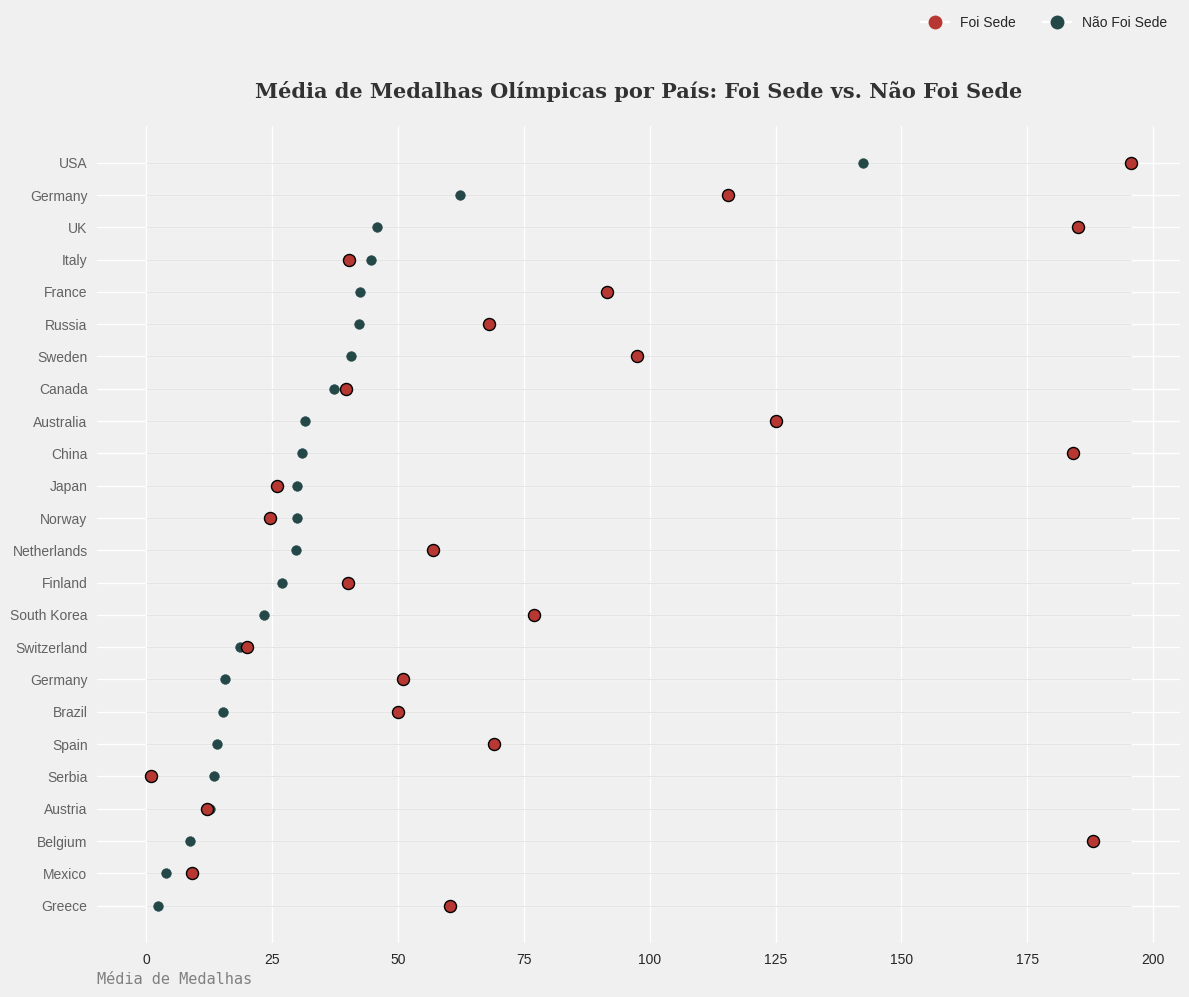

In [115]:
# Ordenar o DataFrame pela media_nao_sede em ordem decrescente
result_sorted = result.sort_values('media_nao_sede', ascending=True)

# Configurar o estilo do plot
plt.style.use('seaborn')
background_color = '#f0f0f0'

# Criar a figura e os eixos
fig, ax = plt.subplots(1, 1, figsize=(12, 10), facecolor=background_color)

# Adicionar linhas horizontais mais escuras
ax.hlines(y=range(1, len(result_sorted) + 1), xmin=0, xmax=max(result_sorted['media_sede'].max(), result_sorted['media_nao_sede'].max()),
          color='gray', alpha=0.3, linewidth=0.5, zorder=1)

# Plotar os dados
for i, (index, row) in enumerate(result_sorted.iterrows(), 1):
    # Média não sede
    ax.scatter(row['media_nao_sede'], i, color='#244747', s=50, zorder=3)
    # Média sede
    ax.scatter(row['media_sede'], i, color='#B73832', ec='black', linewidth=1, s=75, zorder=4)

# Configurar os eixos
ax.set_yticks(range(1, len(result_sorted) + 1))
ax.set_yticklabels(result_sorted['pais'], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xlabel("Média de Medalhas", fontfamily='monospace', loc='left', color='gray')
ax.set_facecolor(background_color)

# Remover as bordas do gráfico
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

# Adicionar título e legendas
plt.title('Média de Medalhas Olímpicas por País: Foi Sede vs. Não Foi Sede', fontsize=15, fontweight='bold', fontfamily='serif', color='#323232', pad=20)

# Adicionar legenda
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Foi Sede', markerfacecolor='#B73832', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Não Foi Sede', markerfacecolor='#244747', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1.15), ncol=2)

plt.tight_layout()
plt.show()

#### 5.1.2 - Conclusão

**Explicação dos dados**

* con e pais: mostram os dados dos países que já sediaram as Olimpíadas pelo menos uma vez na história.
* total_medalhas_sede e total_medalhas_nao_sede: mostram a soma total de medalhas (ouro, prata e bronze) conquistadas por cada país nas edições em que foi sede e nas edições em que não foi sede, respectivamente.
* qtd_vezes_sede e qtd_vezes_nao_sede: mostram a quantidade de vezes que cada país sediou as Olimpíadas e a quantidade de vezes que participou sem ser o país sede, respectivamente.
* media_sede e media_nao_sede: mostram a média de medalhas conquistadas por cada país das vezes em que foi sede e que não foi sede, respectivamente.
* percentual_performance: mostra a porcentagem de melhoria na performance de cada país nas edições em que foi sede em relação às edições em que não foi sede.

**Conclusão**

A análise dos dados mostra que há uma melhora significativa na performance dos países quando sediaram as Olimpíadas. No entanto, acredito que isso não seja apenas pelo fato de "estarem jogando em casa". Pesquisas indicam que os países sede ganham um número relativamente maior de vagas para as competições, aumentando assim suas chances de conquistar medalhas.

### 5.2 - O número de participações femininas vem crescendo ao longo da história das Olímpiadas?

Nesta análise, considerarei apenas os dados referentes às Olimpíadas de Verão, uma vez que a quantidade de atletas nas Olimpíadas de Inverno é significativamente menor e dificultaria a análise. Ao focar apenas nas Olimpíadas de Verão, é possível obter uma visão mais clara e precisa da evolução da participação de homens e mulheres ao longo das edições.

#### 5.2.1 - Query 1

In [116]:
# Define a consulta SQL
query = """SELECT ano,
       con_sede,
       pais_sede,
       COUNT(id) AS qtd_mulheres,
       ROUND((cast(COUNT(id) as float) - LAG(COUNT(id)) OVER (ORDER BY ano)) / LAG(COUNT(id)) OVER (ORDER BY ano) * 100, 2)  AS percentual_mudanca,
       ROUND((cast(COUNT(id) as float) - FIRST_VALUE(COUNT(id)) OVER (ORDER BY ano)) / FIRST_VALUE(COUNT(id)) OVER (ORDER BY ano) * 100, 2) AS percentual_em_relacao_ao_primeiro
FROM Olimpiadas
WHERE sexo = 'F'
  AND temporada = 'Summer'
GROUP BY ano, con_sede, pais_sede
ORDER BY ano;
"""

# Executar a consulta e carregar o resultado em um DataFrame
with engine.connect() as conn:
    result = pd.read_sql(query, conn)

# Mostrar o resultado
result.head(30)

,ano,con_sede,pais_sede,qtd_mulheres,percentual_mudanca,percentual_em_relacao_ao_primeiro
0,1900,FRA,France,33,NaN,0.00
1,1904,USA,USA,16,-51.52,-51.52
2,1906,GRE,Greece,11,-31.25,-66.67
3,1908,GBR,UK,47,327.27,42.42
4,1912,SWE,Sweden,87,85.11,163.64
5,1920,BEL,Belgium,134,54.02,306.06
6,1924,FRA,France,234,74.63,609.09
7,1928,NED,Netherlands,391,67.09,1084.85
8,1932,USA,USA,265,-32.23,703.03
9,1936,GER,Germany,447,68.68,1254.55


#### 5.2.2 - Gráfico 1

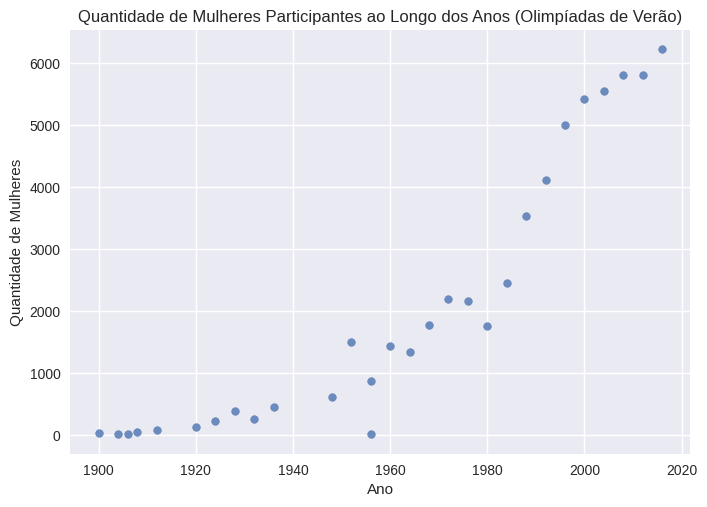

In [117]:
result.plot(kind='scatter', x='ano', y='qtd_mulheres', s=32, alpha=0.8)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Quantidade de Mulheres Participantes ao Longo dos Anos (Olimpíadas de Verão)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Mulheres')
plt.show()

#### 5.2.3 - Query 2

In [118]:
# Define a consulta SQL
query = """SELECT ano,
       con_sede,
       pais_sede,
       COUNT(id) AS qtd_homens,
       ROUND((cast(COUNT(id) as float) - LAG(COUNT(id)) OVER (ORDER BY ano)) / LAG(COUNT(id)) OVER (ORDER BY ano) * 100, 2)  AS percentual_mudanca,
       ROUND((cast(COUNT(id) as float) - FIRST_VALUE(COUNT(id)) OVER (ORDER BY ano)) / FIRST_VALUE(COUNT(id)) OVER (ORDER BY ano) * 100, 2) AS percentual_em_relacao_ao_primeiro
FROM Olimpiadas
WHERE sexo = 'M'
  AND temporada = 'Summer'
GROUP BY ano, con_sede, pais_sede
ORDER BY ano;
"""

# Executar a consulta e carregar o resultado em um DataFrame
with engine.connect() as conn:
    result = pd.read_sql(query, conn)

# Mostrar o resultado
result.head(30)

,ano,con_sede,pais_sede,qtd_homens,percentual_mudanca,percentual_em_relacao_ao_primeiro
0,1896,GRE,Greece,380,NaN,0.00
1,1900,FRA,France,1865,390.79,390.79
2,1904,USA,USA,1285,-31.10,238.16
3,1906,GRE,Greece,1722,34.01,353.16
4,1908,GBR,UK,3022,75.49,695.26
5,1912,SWE,Sweden,3953,30.81,940.26
6,1920,BEL,Belgium,4158,5.19,994.21
7,1924,FRA,France,4876,17.27,1183.16
8,1928,NED,Netherlands,4265,-12.53,1022.37
9,1932,USA,USA,2200,-48.42,478.95


#### 5.2.4 - Gráfico 2

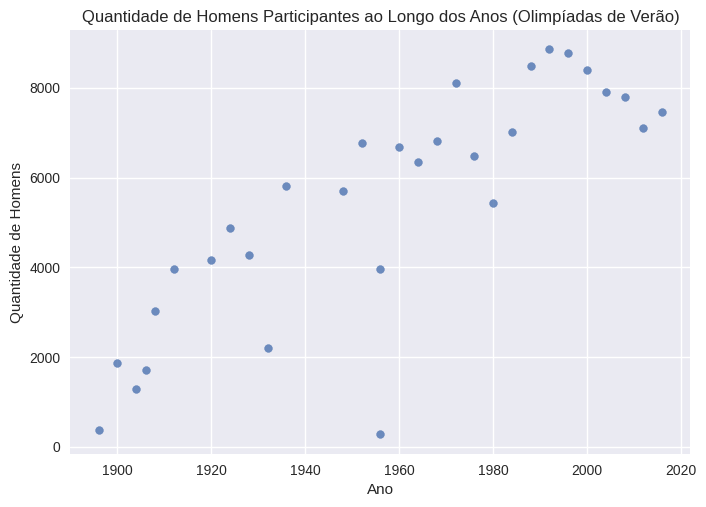

In [119]:
result.plot(kind='scatter', x='ano', y='qtd_homens', s=32, alpha=0.8)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Quantidade de Homens Participantes ao Longo dos Anos (Olimpíadas de Verão)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Homens')
plt.show()

#### 5.2.5 - Query 3

In [120]:
# Define a consulta SQL
query = """WITH qtd_mulheres AS (
  SELECT
    fm.ano,
    fm.con_sede,
    fm.pais_sede,
    COUNT(fm.id) AS qtd_mulheres
  FROM Olimpiadas fm
  WHERE fm.sexo = 'F'
    AND fm.temporada = 'Summer'
  GROUP BY fm.ano, fm.con_sede, fm.pais_sede
),
qtd_homens AS (
  SELECT
    fm.ano,
    fm.con_sede,
    fm.pais_sede,
    COUNT(fm.id) AS qtd_homens
  FROM Olimpiadas fm
  WHERE fm.sexo = 'M'
    AND fm.temporada = 'Summer'
  GROUP BY fm.ano, fm.con_sede, fm.pais_sede
)
SELECT
  COALESCE(qh.ano, qm.ano) AS ano,
  COALESCE(qh.con_sede, qm.con_sede) AS con_sede,
  COALESCE(qh.pais_sede, qm.pais_sede) AS pais_sede,
  COALESCE(qm.qtd_mulheres, 0) AS qtd_mulheres,
  COALESCE(qh.qtd_homens, 0) AS qtd_homens,
  ROUND(COALESCE(cast(qm.qtd_mulheres as float), 0) / (COALESCE(qm.qtd_mulheres, 0) + COALESCE(qh.qtd_homens, 0)) * 100, 2) AS percentual_mulheres,
  ROUND(COALESCE(cast(qh.qtd_homens as float), 0) / (COALESCE(qm.qtd_mulheres, 0) + COALESCE(qh.qtd_homens, 0)) * 100, 2) AS percentual_homens
FROM qtd_homens qh
left JOIN qtd_mulheres qm
  ON qm.ano = qh.ano
  AND qm.con_sede = qh.con_sede
  AND qm.pais_sede = qh.pais_sede
ORDER BY ano;
"""

# Executar a consulta e carregar o resultado em um DataFrame
with engine.connect() as conn:
    result = pd.read_sql(query, conn)

# Mostrar o resultado
result.head(30)

,ano,con_sede,pais_sede,qtd_mulheres,qtd_homens,percentual_mulheres,percentual_homens
0,1896,GRE,Greece,0,380,0.00,100.00
1,1900,FRA,France,33,1865,1.74,98.26
2,1904,USA,USA,16,1285,1.23,98.77
3,1906,GRE,Greece,11,1722,0.63,99.37
4,1908,GBR,UK,47,3022,1.53,98.47
5,1912,SWE,Sweden,87,3953,2.15,97.85
6,1920,BEL,Belgium,134,4158,3.12,96.88
7,1924,FRA,France,234,4876,4.58,95.42
8,1928,NED,Netherlands,391,4265,8.40,91.60
9,1932,USA,USA,265,2200,10.75,89.25


#### 5.2.6 - Gráfico 3

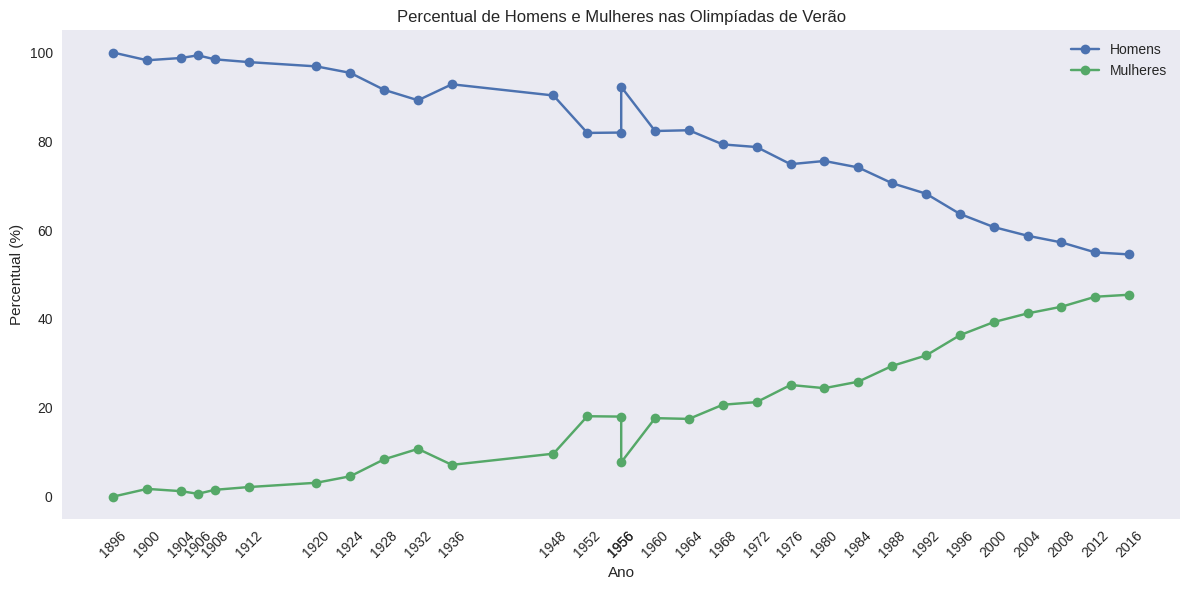

In [121]:
# Criar o gráfico de linhas com a percentagem de homens e mulheres
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura
plt.plot(result['ano'], result['percentual_homens'], label='Homens', marker='o', linestyle='-')
plt.plot(result['ano'], result['percentual_mulheres'], label='Mulheres', marker='o', linestyle='-')

# Definir os rótulos dos eixos x e y
plt.xlabel('Ano')
plt.ylabel('Percentual (%)')

# Definir o título do gráfico
plt.title('Percentual de Homens e Mulheres nas Olimpíadas de Verão')

# Adicionar uma legenda ao gráfico
plt.legend()

# Exibir o gráfico
plt.grid()  # Adiciona uma grade ao gráfico para melhor visualização
plt.xticks(result['ano'], rotation=45)  # Rotaciona os rótulos do eixo x, se necessário
plt.tight_layout()  # Ajusta a disposição do gráfico
plt.show()

#### 5.2.7 - Conclusão

**Explicação dos dados**

* Query 1 - Trago a evolução na quantidade de mulheres no decorrer das edições;
* Gráfico 1 - Ilustro a evolução na quantidade de mulheres;
* Query 2 - Trago a evolução na quantidade de homens no decorrer das edições;
* Gráfico 2 - Ilustro a evolução na quantidade de homens;
* Query 3 - Trago a porcentagem de homens e mulheres no decorrer das edições;
* Gráfico 3 - Ilustro a evolução na porcentagem de homens e mulheres;

**Conclusão**

A participação das mulheres nos Jogos Olímpicos tem aumentado significativamente ao longo das edições. Isso fica muito evidente no gráfico 3, que mostra a evolução da participação de homens e mulheres nas Olimpíadas de Verão.

Na primeira edição dos Jogos em 1896, a participação foi composta por 100% de homens. Nas primeiras 10 edições, a participação das mulheres não chegava a 10%. No entanto, a partir daí, a participação das mulheres começou a aumentar gradualmente.

Em 2016, a participação das mulheres chegou a 45%, quase se igualando ao número de homens. Isso mostra que as mulheres têm ganhado cada vez mais espaço nos Jogos Olímpicos, em uma tendência que provavelmente continuará nas próximas edições.

# 6 - Autoavaliação

Em relação aos objetivos propostos, consegui criar uma estrutura atendendo os requisitos do projeto e consegui resolver as perguntas que foram propostas, o que me faz acreditar que atingi o que havia planejado inicialmente.

No geral, estou satisfeito com os resultados obtidos e acredito que esse trabalho foi uma boa oportunidade para aprofundar meus conhecimentos em análise de dados e criação de visualizações.